In [ ]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.pipeline import Pipeline
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
train_df = pd.read_csv(io.BytesIO(uploaded['train.csv']))
test_df = pd.read_csv(io.BytesIO(uploaded['test.csv']))

In [ ]:
train_df.head()

,Component1_fraction,Component2_fraction,Component3_fraction,Component4_fraction,Component5_fraction,Component1_Property1,Component2_Property1,Component3_Property1,Component4_Property1,Component5_Property1,...,BlendProperty1,BlendProperty2,BlendProperty3,BlendProperty4,BlendProperty5,BlendProperty6,BlendProperty7,BlendProperty8,BlendProperty9,BlendProperty10
0,0.21,0.00,0.42,0.25,0.12,-0.021782,1.981251,0.020036,0.140315,1.032029,...,0.489143,0.607589,0.321670,-1.236055,1.601132,1.384662,0.305850,0.193460,0.580374,-0.762738
1,0.02,0.33,0.19,0.46,0.00,-0.224339,1.148036,-1.107840,0.149533,-0.354000,...,-1.257481,-1.475283,-0.437385,-1.402911,0.147941,-1.143244,-0.439171,-1.379041,-1.280989,-0.503625
2,0.08,0.08,0.18,0.50,0.16,0.457763,0.242591,-0.922492,0.908213,0.972003,...,1.784349,0.450467,0.622687,1.375614,-0.428790,1.161616,0.601289,0.872950,0.660000,2.024576
3,0.25,0.42,0.00,0.07,0.26,-0.577734,-0.930826,0.815284,0.447514,0.455717,...,-0.066422,0.483730,-1.865442,-0.046295,-0.163820,-0.209693,-1.840566,0.300293,-0.351336,-1.551914
4,0.26,0.16,0.08,0.50,0.00,0.120415,0.666268,-0.626934,2.725357,0.392259,...,-0.118913,-1.172398,0.301785,-1.787407,-0.493361,-0.528049,0.286344,-0.265192,0.430513,0.735073


In [ ]:
test_df.head()

,ID,Component1_fraction,Component2_fraction,Component3_fraction,Component4_fraction,Component5_fraction,Component1_Property1,Component2_Property1,Component3_Property1,Component4_Property1,...,Component1_Property9,Component2_Property9,Component3_Property9,Component4_Property9,Component5_Property9,Component1_Property10,Component2_Property10,Component3_Property10,Component4_Property10,Component5_Property10
0,1,0.18,0.05,0.32,0.37,0.08,-0.177804,-0.741219,0.769821,-0.877069,...,-0.265376,0.123432,0.028533,-0.173365,1.297923,0.323299,-0.315146,0.625518,-0.514342,-0.777057
1,2,0.00,0.50,0.00,0.37,0.13,2.501354,0.177344,-0.498739,-0.196742,...,-0.787677,-0.757905,-0.280561,-1.965970,0.543475,-0.906851,0.962341,-0.183757,0.310871,-1.329042
2,3,0.16,0.00,0.17,0.50,0.17,1.547324,0.891479,0.030627,-0.368678,...,-0.710026,-1.422693,0.874071,-1.016144,0.093525,1.048525,-1.321851,0.356640,-0.869543,-0.177255
3,4,0.50,0.00,0.17,0.16,0.17,-0.424427,1.016862,-1.182979,-0.854225,...,-0.551366,0.257105,-0.077337,-0.721031,-0.760365,-0.507690,1.346556,-0.001529,-1.008445,1.726105
4,5,0.00,0.00,0.50,0.50,0.00,-0.187062,-0.762173,-0.473660,2.074087,...,-1.811468,-0.181223,-0.475933,0.234775,-0.909020,1.238203,-1.805664,0.980417,-1.354932,-0.657513


# EXPLORATORY DATA ANALYSIS

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 65 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Component1_fraction    2000 non-null   float64
 1   Component2_fraction    2000 non-null   float64
 2   Component3_fraction    2000 non-null   float64
 3   Component4_fraction    2000 non-null   float64
 4   Component5_fraction    2000 non-null   float64
 5   Component1_Property1   2000 non-null   float64
 6   Component2_Property1   2000 non-null   float64
 7   Component3_Property1   2000 non-null   float64
 8   Component4_Property1   2000 non-null   float64
 9   Component5_Property1   2000 non-null   float64
 10  Component1_Property2   2000 non-null   float64
 11  Component2_Property2   2000 non-null   float64
 12  Component3_Property2   2000 non-null   float64
 13  Component4_Property2   2000 non-null   float64
 14  Component5_Property2   2000 non-null   float64
 15  Comp

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 56 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     500 non-null    int64  
 1   Component1_fraction    500 non-null    float64
 2   Component2_fraction    500 non-null    float64
 3   Component3_fraction    500 non-null    float64
 4   Component4_fraction    500 non-null    float64
 5   Component5_fraction    500 non-null    float64
 6   Component1_Property1   500 non-null    float64
 7   Component2_Property1   500 non-null    float64
 8   Component3_Property1   500 non-null    float64
 9   Component4_Property1   500 non-null    float64
 10  Component5_Property1   500 non-null    float64
 11  Component1_Property2   500 non-null    float64
 12  Component2_Property2   500 non-null    float64
 13  Component3_Property2   500 non-null    float64
 14  Component4_Property2   500 non-null    float64
 15  Compon

In [ ]:
train_df.isnull().sum()

,0
id,0
temperature,1001
irradiance,987
humidity,0
panel_age,1011
maintenance_count,1027
soiling_ratio,1010
voltage,993
current,977
module_temperature,978


# Data Preprocessing

In [ ]:
train_df['wind_speed'] = pd.to_numeric(train_df['wind_speed'], errors='coerce')
train_df['pressure'] = pd.to_numeric(train_df['pressure'], errors='coerce')
train_df['humidity'] = pd.to_numeric(train_df['humidity'], errors='coerce')

In [ ]:
test_df['wind_speed'] = pd.to_numeric(test_df['wind_speed'], errors='coerce')
test_df['pressure'] = pd.to_numeric(test_df['pressure'], errors='coerce')
test_df['humidity'] = pd.to_numeric(test_df['humidity'], errors='coerce')

In [ ]:
lc=LabelEncoder()
train_df['string_id']=lc.fit_transform(train_df['string_id'])
train_df['error_code']=lc.fit_transform(train_df['error_code'])
train_df['installation_type']=lc.fit_transform(train_df['installation_type'])

In [ ]:
test_df['string_id']=lc.fit_transform(test_df['string_id'])
test_df['error_code']=lc.fit_transform(test_df['error_code'])
test_df['installation_type']=lc.fit_transform(test_df['installation_type'])

# Feature Engineering

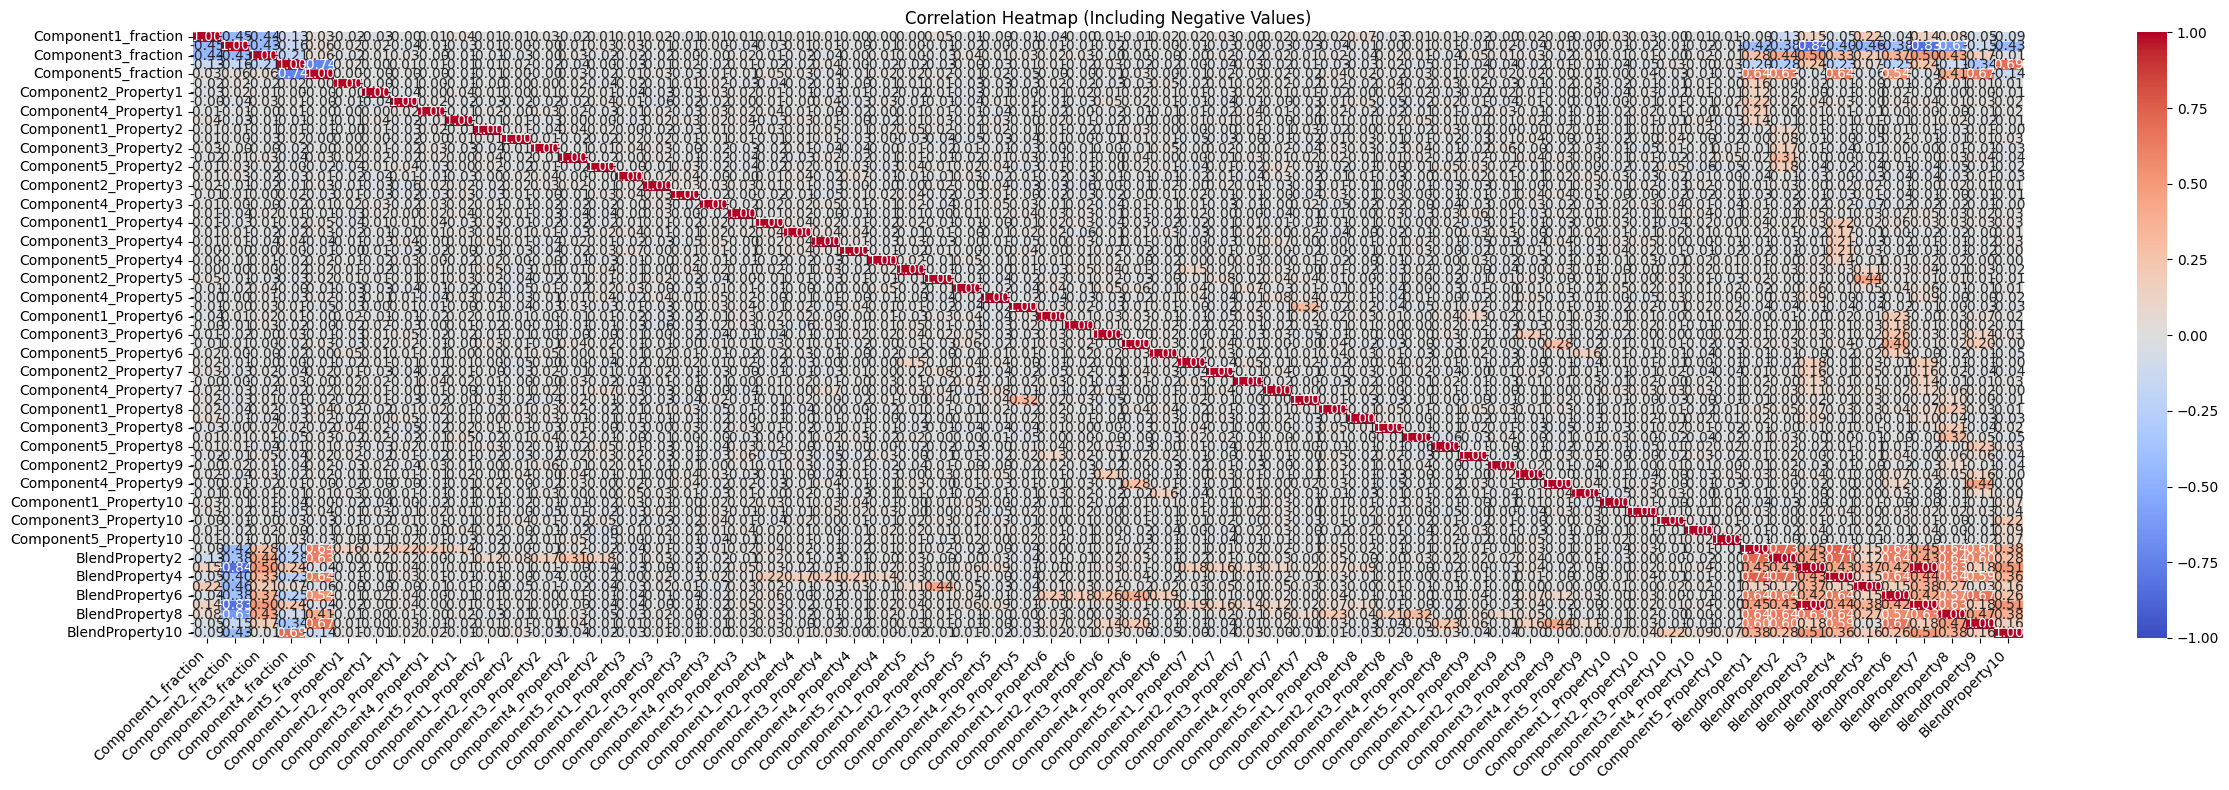

In [ ]:
corr_matrix = train_df.corr()

plt.figure(figsize=(25, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    vmin=-1,
    vmax=1
)

plt.title("Correlation Heatmap (Including Negative Values)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
target_column = 'efficiency'
threshold = 0.02

correlations = train_df.corr()[target_column]

columns_to_keep = correlations[abs(correlations) > threshold].index


df_filtered = train_df[columns_to_keep]

print(f"Original columns: {train_df.columns.tolist()}")
print(f"Columns kept (|correlation| >= {threshold}): {columns_to_keep.tolist()}")
print(f"\nFiltered DataFrame shape: {df_filtered.shape}")

Original columns: ['id', 'temperature', 'irradiance', 'humidity', 'panel_age', 'maintenance_count', 'soiling_ratio', 'voltage', 'current', 'module_temperature', 'cloud_coverage', 'wind_speed', 'pressure', 'string_id', 'error_code', 'installation_type', 'efficiency']
Columns kept (|correlation| >= 0.02): ['temperature', 'irradiance', 'humidity', 'panel_age', 'soiling_ratio', 'voltage', 'current', 'module_temperature', 'efficiency']

Filtered DataFrame shape: (20000, 9)


# Model Building

In [ ]:
targets=['BlendProperty1','BlendProperty2','BlendProperty3','BlendProperty4','BlendProperty5','BlendProperty6','BlendProperty7','BlendProperty8','BlendProperty9','BlendProperty10']
X = train_df.drop(columns=targets,axis=1)
y = train_df[targets]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import StackingRegressor, HistGradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureBlender(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.scaler = StandardScaler()
        self.quantile = QuantileTransformer(output_distribution='normal')

    def fit(self, X, y=None):
        self.scaler.fit(X)
        self.quantile.fit(X)
        return self

    def transform(self, X):
        return np.hstack([
            X,
            self.scaler.transform(X),
            self.quantile.transform(X)
        ])

hybrid_model = Pipeline([
    ('feature_blender', FeatureBlender()),
    ('stacking', StackingRegressor(
        estimators=[
            ('lgbm', LGBMRegressor(
                n_estimators=50,
                learning_rate=0.1,
                max_depth=4,
                num_leaves=15,
                min_child_samples=20,
                subsample=0.8,
                colsample_bytree=0.7,
                random_state=42,
                n_jobs=-1,
                verbose=-1
            )),
            ('hgb', HistGradientBoostingRegressor(
                max_iter=125,
                max_depth=5,
                l2_regularization=0.1,
                random_state=42
            ))
        ],
        final_estimator=RidgeCV(cv=3),
        cv=5,
        passthrough=True,
        n_jobs=-1
    ))
])

hybrid_model.fit(X_train, y_train)
y_pred_train = hybrid_model.predict(X_test)

TypeError: MultiOutputRegressor.__init__() got an unexpected keyword argument 'final_estimator'

In [ ]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import StackingRegressor, HistGradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

# Define your feature blender (unchanged)
class FeatureBlender(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.scaler = StandardScaler()
        self.quantile = QuantileTransformer(output_distribution='normal')

    def fit(self, X, y=None):
        self.scaler.fit(X)
        self.quantile.fit(X)
        return self

    def transform(self, X):
        return np.hstack([
            X,
            self.scaler.transform(X),
            self.quantile.transform(X)
        ])

# List of your 10 target columns
target_columns = ['BlendProperty1', 'BlendProperty2', 'BlendProperty3',
                  'BlendProperty4', 'BlendProperty5', 'BlendProperty6',
                  'BlendProperty7', 'BlendProperty8', 'BlendProperty9',
                  'BlendProperty10']

# Dictionary to store individual models
models = {}

# Train one model per target column
for target in target_columns:
    print(f"Training model for {target}...")

    # Create a fresh pipeline for each target
    model = Pipeline([
        ('feature_blender', FeatureBlender()),
        ('stacking', StackingRegressor(
            estimators=[
                ('lgbm', LGBMRegressor(
                    n_estimators=50,
                    learning_rate=0.1,
                    max_depth=4,
                    num_leaves=15,
                    min_child_samples=20,
                    subsample=0.8,
                    colsample_bytree=0.7,
                    random_state=42,
                    n_jobs=-1,
                    verbose=-1
                )),
                ('hgb', HistGradientBoostingRegressor(
                    max_iter=125,
                    max_depth=5,
                    l2_regularization=0.1,
                    random_state=42
                ))
            ],
            final_estimator=RidgeCV(cv=3),
            cv=5,
            passthrough=True,
            n_jobs=-1
        ))
    ])

    # Train on the specific target column
    model.fit(X_train, y_train[target])
    models[target] = model

# Generate predictions for all targets
predictions = {}
for target in target_columns:
    predictions[target] = models[target].predict(X_test)

# Convert predictions to DataFrame
y_pred_test = pd.DataFrame(predictions)

Training model for BlendProperty1...
Training model for BlendProperty2...
Training model for BlendProperty3...
Training model for BlendProperty4...
Training model for BlendProperty5...
Training model for BlendProperty6...
Training model for BlendProperty7...
Training model for BlendProperty8...
Training model for BlendProperty9...
Training model for BlendProperty10...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

In [ ]:
error=mean_absolute_percentage_error(y_test,y_pred_test)
error

2.4007155041773443

In [ ]:
score=max(10,(100-(90*error)/2.72))
score

20.56456052354376

##Test Data

In [ ]:
X_val = test_df.drop(columns="ID",axis=1)
y_pred=hybrid_model.predict(X_val)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
output = pd.DataFrame({
    'id': test_df['id'],
    'BlendProperty1': y_pred[:, 0],
    'BlendProperty2': y_pred[:, 1],
    'BlendProperty3': y_pred[:, 2],
    'BlendProperty4': y_pred[:, 3],
    'BlendProperty5': y_pred[:, 4],
    'BlendProperty6': y_pred[:, 5],
    'BlendProperty7': y_pred[:, 6],
    'BlendProperty8': y_pred[:, 7],
    'BlendProperty9': y_pred[:, 8],
    'BlendProperty10': y_pred[:, 9]
})

output.to_csv('predictions.csv', index=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
if 'ID' in test_df.columns:
    X_val = test_df.drop(columns=['ID'])
else:
    X_val = test_df.copy()
test_predictions = {}
for target in target_columns:
    print(f"Generating predictions for {target}...")
    test_predictions[target] = models[target].predict(X_val)
y_pred_test = pd.DataFrame(test_predictions)
output = pd.DataFrame({
    'ID': test_df['ID'],  # Preserve original IDs
    **y_pred_test
})
output = output[['ID'] + target_columns]
output.to_csv('Shell_test_predictions.csv', index=False)

Generating predictions for BlendProperty1...
Generating predictions for BlendProperty2...
Generating predictions for BlendProperty3...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Generating predictions for BlendProperty4...
Generating predictions for BlendProperty5...
Generating predictions for BlendProperty6...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Generating predictions for BlendProperty7...
Generating predictions for BlendProperty8...
Generating predictions for BlendProperty9...
Generating predictions for BlendProperty10...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
from google.colab import files
files.download('Shell_test_predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>